#Survival Prediction on Titanic dataset
Task 1

Name : Sahil Kewat
# sunny2018kewat@gmail.com
Data Science Internship
#Seven7code Tech

In [ ]:
#1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#2. Importing data and creating dataframe
df = pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.shape

(891, 12)

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = df.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Cabin'])
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
df.shape

(891, 8)

In [ ]:
#3. Data Pre-Proceesing
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
# Total Family members
df['family_tot_members'] = df['SibSp'] + df['Parch']
df['family_tot_members'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_tot_members, dtype: int64

In [ ]:
df.drop(columns = ['SibSp' , 'Parch'] , inplace = True)

In [ ]:
#4. Splitting data into input and output.
X = df.iloc[:,1:]
X.head()

,Pclass,Sex,Age,Fare,Embarked,family_tot_members
0,3,male,22.0,7.2500,S,1
1,1,female,38.0,71.2833,C,1
2,3,female,26.0,7.9250,S,0
3,1,female,35.0,53.1000,S,1
4,3,male,35.0,8.0500,S,0


In [ ]:
y = df.iloc[:,:1]
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [ ]:
print(X.shape , y.shape)

(891, 6) (891, 1)


In [ ]:
#5. Train and test variables X and y
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 0 , test_size = 0.3)

In [ ]:
#6. Normalization or Scaling for input variables
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer  = ColumnTransformer(transformers = [
    ('tf1' , SimpleImputer(), ['Age'] ),
    ('tf2' , OneHotEncoder(sparse = False , drop = 'first' , dtype = np.int32) , ['Embarked']),
    ('tf3' , OneHotEncoder(sparse = False , dtype = np.int32) , ['Sex'])
] , remainder = 'passthrough')

In [ ]:
X_train_transformed = transformer.fit_transform(X_train)
X_test_transformed = transformer.transform(X_test)

In [ ]:
X_train_transformed.shape , X_test_transformed.shape

((623, 9), (268, 9))

In [ ]:
X_train_transformed = pd.DataFrame(X_train_transformed)
X_test_transformed = pd.DataFrame(X_test_transformed)

In [ ]:
X_train_transformed.head()

,0,1,2,3,4,5,6,7,8
0,51.000000,0.0,1.0,0.0,0.0,1.0,1.0,26.5500,0.0
1,49.000000,0.0,0.0,0.0,1.0,0.0,1.0,76.7292,1.0
2,1.000000,0.0,1.0,0.0,0.0,1.0,3.0,46.9000,7.0
3,54.000000,0.0,1.0,0.0,0.0,1.0,1.0,77.2875,1.0
4,29.915339,0.0,0.0,0.0,1.0,0.0,3.0,14.4583,1.0


<Axes: >

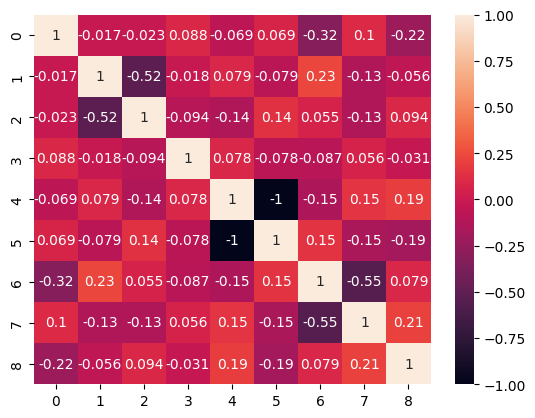

In [ ]:
sns.heatmap(X_train_transformed.corr(), annot = True)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train_transformed)
X_test_scaled = scaler.transform(X_test_transformed)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)

In [ ]:
np.round(X_train.describe() , 1)

,Pclass,Age,Fare,family_tot_members
count,623.0,502.0,623.0,623.0
mean,2.3,29.9,32.5,0.9
std,0.8,14.5,48.3,1.7
min,1.0,0.7,0.0,0.0
25%,1.5,21.0,7.9,0.0
50%,3.0,29.0,15.0,0.0
75%,3.0,38.0,31.4,1.0
max,3.0,80.0,512.3,10.0


In [ ]:
np.round(X_train_scaled.describe() , 1)

,0,1,2,3,4,5,6,7,8
count,623.0,623.0,623.0,623.0,623.0,623.0,623.0,623.0,623.0
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.2,-0.3,-1.7,-0.1,-0.7,-1.4,-1.5,-0.7,-0.5
25%,-0.5,-0.3,-1.7,-0.1,-0.7,-1.4,-0.9,-0.5,-0.5
50%,-0.0,-0.3,0.6,-0.1,-0.7,0.7,0.8,-0.4,-0.5
75%,0.5,-0.3,0.6,-0.1,1.4,0.7,0.8,-0.0,0.0
max,3.8,3.2,0.6,17.6,1.4,0.7,0.8,10.0,5.4


In [ ]:
#7. Model Buliding and Applying Regressor
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
#8. Fitting the model
model.fit(X_train_scaled , y_train)

LogisticRegression()

In [ ]:
#9. Predicting the Output
y_pred = model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [ ]:
#10. Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score

In [ ]:
print('Accuracy Score:' , accuracy_score(y_test , y_pred)*100)

Accuracy Score: 79.8507462686567


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

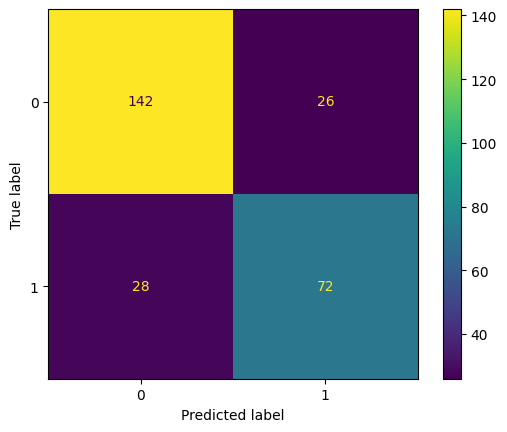

In [ ]:
cm = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
# -->9 variables inputs and the model will predict the survival output whether it will 0 for not survived and 1 for survived.
model.predict([[0, 0, 0, 1, 1, 0, 1, 1, 1]])

array([0])